In [78]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [79]:
players=pd.read_csv('/Users/_senyonjo/Downloads/fifa/players_22.csv')
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [80]:
import warnings
warnings.filterwarnings('ignore')

In [81]:
players.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [82]:
features=['overall', 'potential', 'value_eur', 'wage_eur',
       'age']

In [83]:
players.isnull().any()

sofifa_id           False
player_url          False
short_name          False
long_name           False
player_positions    False
                    ...  
player_face_url     False
club_logo_url        True
club_flag_url        True
nation_logo_url      True
nation_flag_url     False
Length: 110, dtype: bool

In [84]:
players.dropna(subset=features,inplace=True)

In [85]:
data=players[features].copy()

In [86]:
data

,overall,potential,value_eur,wage_eur,age
0,93,93,78000000.0,320000.0,34
1,92,92,119500000.0,270000.0,32
2,91,91,45000000.0,270000.0,36
3,91,91,129000000.0,270000.0,29
4,91,91,125500000.0,350000.0,30
...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22
19235,47,59,110000.0,500.0,19
19236,47,55,100000.0,500.0,21
19237,47,60,110000.0,500.0,19


In [87]:
#here i have to scale te data using the max min method
data=(data-data.min())/(data.max()-data.min())*9+1

In [88]:
data

,overall,potential,value_eur,wage_eur,age
0,10.000000,9.608696,4.618307,9.227468,7.000000
1,9.804348,9.413043,6.543654,7.939914,6.333333
2,9.608696,9.217391,3.087308,7.939914,7.666667
3,9.608696,9.217391,6.984396,7.939914,5.333333
4,9.608696,9.217391,6.822018,10.000000,5.666667
...,...,...,...,...,...
19234,1.000000,1.586957,1.002830,1.012876,3.000000
19235,1.000000,2.956522,1.004686,1.000000,2.000000
19236,1.000000,2.173913,1.004222,1.000000,2.666667
19237,1.000000,3.152174,1.004686,1.000000,2.000000


In [89]:
data.describe()

,overall,potential,value_eur,wage_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.131826,1.219443,4.063345
std,1.346635,1.191076,0.353229,0.501528,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.021620,1.012876,2.666667
50%,4.717391,5.304348,1.044817,1.064378,4.000000
75%,5.500000,6.086957,1.092370,1.193133,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [90]:
players.shape

(19165, 110)

In [91]:
#select random centroids
import numpy as np
def random_centroids(data,k):
  centroids=[]
  for i in range(k):
    centroid=data.apply(lambda x: float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids,axis=1)

In [103]:
centroids=random_centroids(data,5)
centroids

,overall,potential,value_eur,wage_eur,age
0,5.695652,5.695652,1.005614,1.296137,4.000000
1,3.934783,6.673913,1.020460,1.064378,2.333333
2,5.108696,5.108696,1.019300,1.115880,5.333333
3,4.717391,4.913043,1.007933,1.115880,4.333333
4,5.304348,6.478261,1.161961,1.000000,1.333333


In [93]:
 distance=centroids.apply(lambda x : np.sqrt((data-x)**2).sum(axis=1) )
 distance

,0,1,2,3,4
0,23.487899,28.721471,26.802531,23.923300,25.810172
1,23.067721,28.301294,26.382353,23.503122,25.389994
2,20.553404,25.786977,23.868036,20.988806,22.875677
3,22.117159,27.350731,25.431791,22.552560,24.439432
4,24.348199,29.581772,27.662831,24.783601,26.670472
...,...,...,...,...,...
19234,9.363910,6.130337,9.382611,8.928508,7.057088
19235,9.005364,3.771792,7.024066,8.569963,6.683091
19236,9.121770,5.221531,8.473805,8.686369,6.799497
19237,8.809712,3.576140,6.828413,8.374311,6.487439


In [94]:
# get labels
def get_labels(data,centroids):
  distance=centroids.apply(lambda x : np.sqrt((data-x)**2).sum(axis=1))
  return distance.idxmax(axis=1)

In [95]:
labels=get_labels(data,centroids)
labels.value_counts()

1    8411
2    5276
3    3132
0    2320
4      26
dtype: int64

In [106]:
#getting the new clusters

def new_clusters(data,centroids,labels):
  return data.groupby(labels).apply(lambda x : np.exp(np.log(x).mean())).T
  
  

In [107]:
#libraries to use for the algorithm
from IPython.display import clear_output
import matplotlib.pyplot as plt


In [110]:
def plot_clusters(data,centroids,labels , iterarion):
  pca=PCA(n_components=2)
  data_2d=pca.fit_transform(data)
  centroids_2d=pca.transform(centroids.T)
  clear_output(wait=True)
  plt.title(f'iteration: {iteration}')
  plt.scatter(x=data_2d[:,0],y=data_2d[:,1],c=labels)
  plt.scatter(x=centroids_2d[:,0],y=centroids_2d[:,1])
  plt.show()


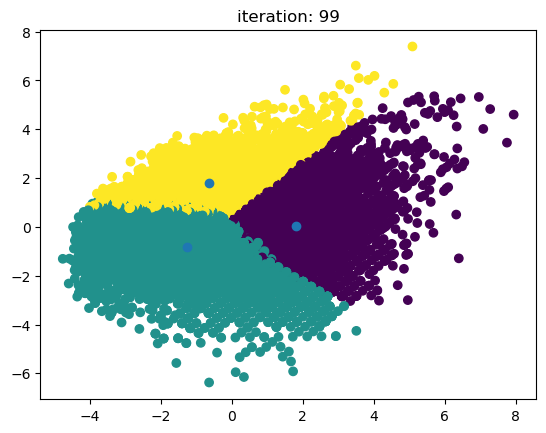

In [112]:
#ow we right the bpody of the algorithm
max_iterations=100
k=5

centroids=random_centroids(data,k)
old_centroids=pd.DataFrame()
iteration=1

while iteration< max_iterations and not centroids.equals(old_centroids):
  old_centroids=centroids

  labels=get_labels(data,centroids)
  centroids=new_clusters(data,centroids,labels)
  plot_clusters(data,centroids,labels , iteration)
  iteration+=1

In [113]:
centroids

,2,3,4
overall,5.937444,3.599779,4.827783
potential,5.706353,4.361317,6.558293
value_eur,1.198850,1.025300,1.169025
wage_eur,1.398006,1.035123,1.204882
age,5.280151,3.629413,2.603976


In [116]:
players[labels==2][['short_name']+features]

,short_name,overall,potential,value_eur,wage_eur,age
0,L. Messi,93,93,78000000.0,320000.0,34
1,R. Lewandowski,92,92,119500000.0,270000.0,32
2,Cristiano Ronaldo,91,91,45000000.0,270000.0,36
3,Neymar Jr,91,91,129000000.0,270000.0,29
4,K. De Bruyne,91,91,125500000.0,350000.0,30
...,...,...,...,...,...,...
8896,D. Cole,66,68,1100000.0,13000.0,26
9000,I. Näsberg,66,73,1600000.0,2000.0,25
9093,J. Gómez,66,73,1600000.0,950.0,25
9215,G. Aguirre,66,73,1600000.0,4000.0,25


In [117]:
players[labels==3][['short_name']+features]

,short_name,overall,potential,value_eur,wage_eur,age
5962,Alson Botelho,69,69,1500000.0,6000.0,21
5966,Bruno Fagundeiro,69,69,1600000.0,6000.0,21
5972,Diogildo Peixe,69,69,1600000.0,5000.0,21
5975,Sevinho Santos,69,69,1700000.0,6000.0,21
6863,J. Strauß,68,69,1400000.0,4000.0,25
...,...,...,...,...,...,...
19234,Song Defu,47,52,70000.0,1000.0,22
19235,C. Porter,47,59,110000.0,500.0,19
19236,N. Logue,47,55,100000.0,500.0,21
19237,L. Rudden,47,60,110000.0,500.0,19


In [118]:
players[labels==4][['short_name']+features]

,short_name,overall,potential,value_eur,wage_eur,age
6,K. Mbappé,91,95,194000000.0,230000.0,22
21,G. Donnarumma,89,93,119500000.0,110000.0,22
29,E. Haaland,88,93,137500000.0,110000.0,20
43,F. de Jong,87,92,119500000.0,210000.0,24
44,T. Alexander-Arnold,87,92,114000000.0,150000.0,22
...,...,...,...,...,...,...
18943,R. O'Kane,51,75,180000.0,500.0,17
18992,J. Nieuwenhuizen,51,74,170000.0,500.0,17
18999,J. Abankwah,51,74,170000.0,500.0,17
19039,K. Paulsen,50,74,140000.0,500.0,17


In [132]:
kmeans=KMeans(5)

In [133]:
k=kmeans.fit(data)
k

KMeans(n_clusters=5)

In [134]:
centroids=k.cluster_centers_
centroids

array([[7.09320217, 7.30465609, 1.9180931 , 2.29006446, 4.30641184],
       [2.9829861 , 4.83875917, 1.01909065, 1.02118239, 2.45714734],
       [5.71028241, 5.35102266, 1.09121637, 1.28071364, 6.06389509],
       [4.24867225, 4.07255379, 1.02785845, 1.05302073, 5.047389  ],
       [4.92242281, 6.09188341, 1.09478169, 1.14671603, 3.12808556]])

In [135]:
pd.DataFrame(centroids,columns=features).T

,0,1,2,3,4
overall,7.093202,2.982986,5.710282,4.248672,4.922423
potential,7.304656,4.838759,5.351023,4.072554,6.091883
value_eur,1.918093,1.019091,1.091216,1.027858,1.094782
wage_eur,2.290064,1.021182,1.280714,1.053021,1.146716
age,4.306412,2.457147,6.063895,5.047389,3.128086


In [130]:
centroids=pd.concat(centroids,columns=features).T
centroids

TypeError: concat() got an unexpected keyword argument 'columns'